In [1]:
import copy
import os.path as osp
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.insert(0, "../src/")


In [2]:
# Plot params
mpl.style.use("seaborn-dark")
mpl.rcParams['axes.grid'] = True
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['figure.dpi'] = 85
mpl.rcParams['axes.labelsize'] = 'large'

# This is the largest possible value of the logloss
logloss_inf_limit = -np.log(np.finfo('float').eps)


In [3]:
# Define result path
res_path = osp.join('..', 'output', 'real_data_20200806_070825', 'results.csv')

res_df = pd.read_csv(res_path)
print(res_df.columns)
res_df.head(3)


Index(['dataset_name', 'trainset_size', 'trail_num', 'valset_size',
       'testset_size', 'num_features', 'mn_test_mse', 'mn_theta_norm',
       'mn_test_logloss', 'mn_variance', 'genie_test_logloss',
       'genie_test_mse', 'genie_theta_norm', 'empirical_pnml_regret',
       'empirical_pnml_test_logloss', 'analytical_pnml_regret',
       'analytical_pnml_test_logloss', 'mdl_lambda_opt', 'mdl_test_mse',
       'mdl_theta_norm', 'mdl_test_logloss', 'mdl_variance', 'test_idx'],
      dtype='object')


,dataset_name,trainset_size,trail_num,valset_size,testset_size,num_features,mn_test_mse,mn_theta_norm,mn_test_logloss,mn_variance,...,empirical_pnml_regret,empirical_pnml_test_logloss,analytical_pnml_regret,analytical_pnml_test_logloss,mdl_lambda_opt,mdl_test_mse,mdl_theta_norm,mdl_test_logloss,mdl_variance,test_idx
0,645_fri_c3_500_50,2,0,100,100,51,1.986049,0.204981,1.890306,1.047105,...,0.725980,1.751541,0.907787,1.933348,[122.0230126],2.388274,0.057008,2.070543,1.066956,0
1,645_fri_c3_500_50,2,0,100,100,51,0.570120,0.204981,1.214190,1.047105,...,0.702355,1.647140,0.859205,1.803990,[122.0230126],0.478222,0.057008,1.175449,1.066956,1
2,645_fri_c3_500_50,2,0,100,100,51,0.091802,0.204981,0.985789,1.047105,...,0.710326,1.652299,0.876578,1.818551,[122.0230126],0.242431,0.057008,1.064952,1.066956,2


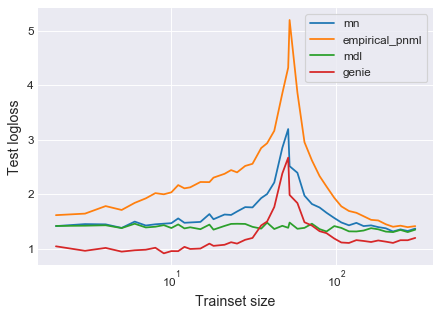

In [4]:
# Create mean df
res_mean_df = res_df.groupby('trainset_size').mean().reset_index()

# Plot learners logloss
keys = ['mn',
        'empirical_pnml',
#         'analytical_pnml',
        'mdl',
        'genie']
for key in keys:
    plt.plot(res_mean_df['trainset_size'], res_mean_df[key + '_test_logloss'], label=key)
    plt.legend()
plt.ylabel('Test logloss')
plt.xlabel('Trainset size')
plt.xscale('log')
plt.show()


In [5]:
# Choose specific configurations
dataset_name = '645_fri_c3_500_50'
print('trainset_size: ', res_mean_df.trainset_size.unique())
trainset_size = 15
trail_num = 0
df = res_df[(res_df['dataset_name'] == dataset_name) & \
            (res_df['trainset_size'] == trainset_size) & \
            (res_df['trail_num'] == trail_num)
            ]

trainset_size:  [  2   3   4   5   6   7   8   9  10  11  12  13  15  17  18  21  23  25
  28  31  35  38  42  47  51  52  58  64  71  79  87  97 107 119 132 146
 162 179 199 220 244 270 300]


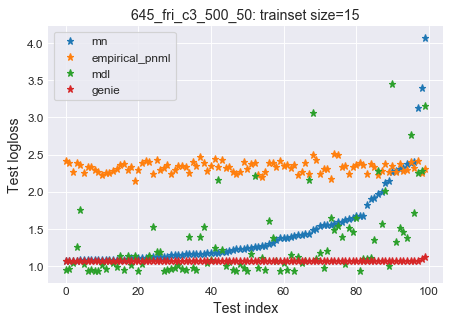

In [6]:
# Plot learners logloss for each sample
df_sorted = df.sort_values(by=['mn_test_logloss'])
df_sorted = df_sorted.reset_index()
keys = ['mn',
        'empirical_pnml',
#         'analytical_pnml',
        'mdl',
        'genie']
for key in keys:
    plt.plot(df_sorted[key + '_test_logloss'], '*', label=key)
plt.legend()
plt.title('{}: trainset size={}'.format(dataset_name, trainset_size))
plt.xlabel('Test index')
plt.ylabel('Test logloss')
# plt.xscale('log')
plt.show()


## Different norm constrain

In [7]:
res_list = [{'norm_constrain':1.0,
            'res_path':osp.join('..', 'output', 'real_data_20200806_070825', 'results.csv')},
            {'norm_constrain':0.25,
            'res_path':osp.join('..', 'output', 'real_data_20200806_090831', 'results.csv')},
#             {'norm_constrain':0.05,
#             'res_path':osp.join('..', 'output', 'real_data_20200806_100832', 'results.csv')}
           ]

for res in res_list:
    res_df = pd.read_csv(res['res_path'])
    res['res_df'] = copy.deepcopy(res_df)
    res['res_mean_df'] = copy.deepcopy(res_df.groupby('trainset_size').mean().reset_index())
                            

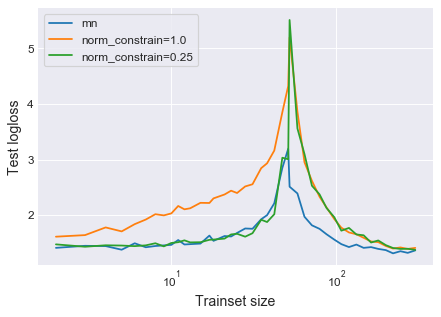

In [8]:
trainset_size, mn_logloss = res_mean_df['trainset_size'], res_mean_df['mn_test_logloss']
plt.plot(trainset_size, mn_logloss, label='mn')
for res in res_list:
    logloss = res['res_mean_df']['empirical_pnml_test_logloss']
    trainset_size = res['res_mean_df']['trainset_size']
    plt.plot(trainset_size, logloss, label='norm_constrain=' + str(res['norm_constrain']))
plt.legend()
plt.ylabel('Test logloss')
plt.xlabel('Trainset size')
plt.xscale('log')
plt.show()


trainset_size:  [  2   3   4   5   6   7   8   9  10  11  12  13  15  17  18  21  23  25
  28  31  35  38  42  47  51  52  58  64  71  79  87  97 107 119 132 146
 162 179 199 220 244 270 300]


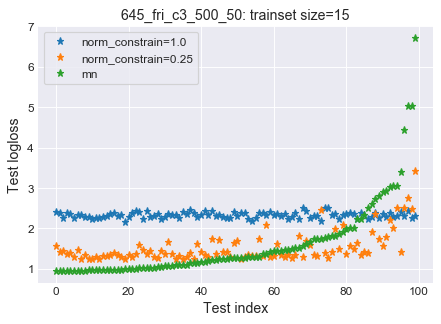

In [13]:
# Choose specific configurations
dataset_name = '645_fri_c3_500_50'
print('trainset_size: ', res_mean_df.trainset_size.unique())
trainset_size = 15
trail_num = 0

for res in res_list:
    res_df = res['res_df']
    df = res_df[(res_df['dataset_name'] == dataset_name) & \
                (res_df['trainset_size'] == trainset_size) & \
                (res_df['trail_num'] == trail_num)]

    # Plot learners logloss for each sample
    df_sorted = df.sort_values(by=['mn_test_logloss'])
    df_sorted = df_sorted.reset_index()
    plt.plot(df_sorted['empirical_pnml_test_logloss'], '*', label='norm_constrain=' + str(res['norm_constrain']))
plt.plot(df_sorted['mn_test_logloss'], '*', label='mn')
    
plt.legend()
plt.title('{}: trainset size={}'.format(dataset_name, trainset_size))
plt.xlabel('Test index')
plt.ylabel('Test logloss')
# plt.xscale('log')
plt.show()
